In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset.shape

(768, 9)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


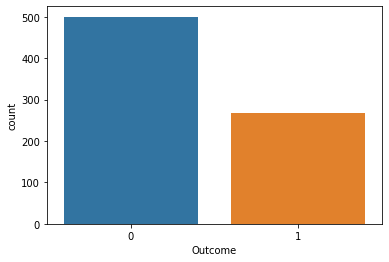

In [6]:
sns.countplot(x='Outcome',data=dataset)

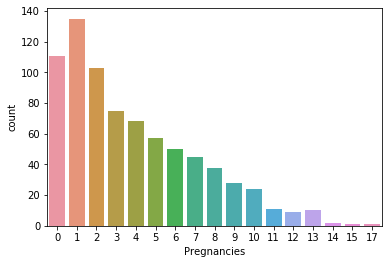

In [7]:
sns.countplot(x='Pregnancies',data=dataset)

In [9]:
keys=dataset.keys()[:-1]
keys

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [10]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

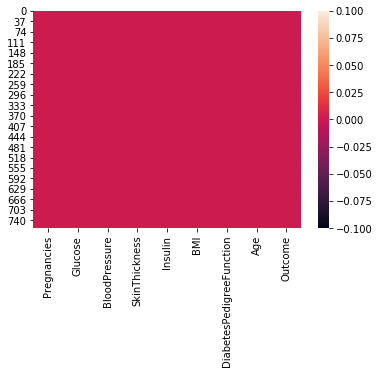

In [11]:
sns.heatmap(dataset.isnull())

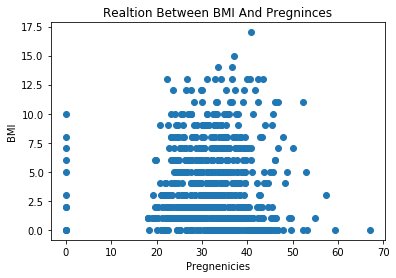

In [14]:
plt.scatter(dataset['BMI'],dataset['Pregnancies'])
plt.xlabel('Pregnenicies')
plt.ylabel('BMI')
plt.title('Realtion Between BMI And Pregninces')
plt.show()

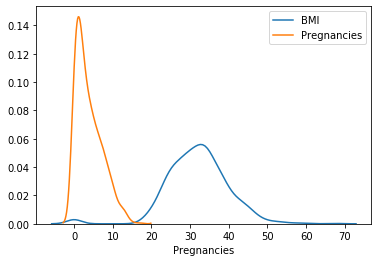

In [15]:
sns.distplot(dataset['BMI'],hist=False,label='BMI')
sns.distplot(dataset['Pregnancies'],hist=False,label='Pregnancies')

In [16]:
data_in=dataset.iloc[:,:-1]
data_in

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [17]:
data_in=np.array(data_in)

In [18]:
data_in.shape

(768, 8)

In [19]:
data_out=dataset.iloc[:,-1]
data_out

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [20]:
data_out.shape

(768,)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
sc=MinMaxScaler(feature_range=(0,1))

In [23]:
data_in=sc.fit_transform(data_in)

In [24]:
data_in

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [26]:
dici={}
for i in range(len(keys)):
    dici.update({keys[i]:data_in[:,i]})

In [27]:
dataset=pd.DataFrame(dici)
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [28]:
final_data=pd.concat([data_out,dataset],axis=1)

In [29]:
final_data.head()

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,1,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,1,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train,test=train_test_split(final_data,test_size=0.2)

In [32]:
print(train.shape)
print(test.shape)

(614, 9)
(154, 9)


In [33]:
import boto3,re,os,json,sagemaker
from sagemaker import get_execution_role

In [34]:
role=get_execution_role()
print(role)

arn:aws:iam::846319470919:role/service-role/AmazonSageMaker-ExecutionRole-20200910T165326


In [35]:
my_region=boto3.session.Session().region_name
print(my_region)

us-east-1


In [36]:
containers = {'us-west-2': '433757028032.dkr.ecr.us-west-2.amazonaws.com/xgboost:latest',
              'us-east-1': '811284229777.dkr.ecr.us-east-1.amazonaws.com/xgboost:latest',
              'us-east-2': '825641698319.dkr.ecr.us-east-2.amazonaws.com/xgboost:latest',
              'eu-west-1': '685385470294.dkr.ecr.eu-west-1.amazonaws.com/xgboost:latest'}

In [37]:
print(containers[my_region])

811284229777.dkr.ecr.us-east-1.amazonaws.com/xgboost:latest


In [38]:
prefix='sagemaker/Diabetis'
bucket_name='buildathonproject1'

In [39]:
final_data.to_csv('train.csv',index=False,header=False)
boto3.Session().resource('s3').Bucket(bucket_name).Object(os.path.join(prefix,'train/train.csv')).upload_file('train.csv')
s3_input_train=sagemaker.s3_input(s3_data='s3://{}/{}/train'.format(bucket_name, prefix),content_type='csv')

's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.


In [40]:
#binary:logistic –logistic regression for binary classification, returns predicted probability (not class)
#multi:softmax –multiclass classification using the softmax objective, returns predicted class (not probabilities)

In [41]:
sess=sagemaker.Session()
diabetis_model=sagemaker.estimator.Estimator(containers[my_region],role,train_instance_count=1,train_instance_type='ml.m5.large',output_path='s3://{}/{}/output'.format(bucket_name,prefix),sagemaker_session=sess)
diabetis_model.set_hyperparameters(max_depth=5,eta=0.2,gamma=4,min_child_weight=6,subsample=0.8,silent=0,objective='binary:logistic',num_round=100)

Parameter image_name will be renamed to image_uri in SageMaker Python SDK v2.


In [42]:
diabetis_model.fit({'train':s3_input_train})

2020-09-29 10:55:12 Starting - Starting the training job...
2020-09-29 10:55:14 Starting - Launching requested ML instances......
2020-09-29 10:56:37 Starting - Preparing the instances for training......
2020-09-29 10:57:19 Downloading - Downloading input data...
2020-09-29 10:58:14 Training - Training image download completed. Training in progress.
2020-09-29 10:58:14 Uploading - Uploading generated training model
2020-09-29 10:58:14 Completed - Training job completed
Arguments: train
[2020-09-29:10:58:01:INFO] Running standalone xgboost training.
[2020-09-29:10:58:01:INFO] Path /opt/ml/input/data/validation does not exist!
[2020-09-29:10:58:01:INFO] File size need to be processed in the node: 0.1mb. Available memory size in the node: 179.14mb
[2020-09-29:10:58:01:INFO] Determined delimiter of CSV input is ','
[10:58:01] S3DistributionType set as FullyReplicated
[10:58:01] 768x8 matrix with 6144 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[10:58:

In [43]:
detector=diabetis_model.deploy(initial_instance_count=1,instance_type='ml.m5.large')

Parameter image will be renamed to image_uri in SageMaker Python SDK v2.


-------------!

In [44]:
detector.endpoint

'xgboost-2020-09-29-10-55-12-525'

In [45]:
from sagemaker.predictor import csv_serializer

In [46]:
test_data_array=test.drop('Outcome',axis=1).values #load the data into an array
detector.content_type = 'text/csv' # set the data type for an inference
detector.serializer = csv_serializer # set the serializer type
print(type(test_data_array))
print(test_data_array.shape)
predictions=detector.predict(test_data_array).decode('utf-8') # predict!
predictions_array = np.fromstring(predictions[1:], sep=',') # and turn the prediction into an array
print(predictions_array.shape)

<class 'numpy.ndarray'>
(154, 8)
(154,)


In [47]:
print(predictions)

0.869257152081,0.893998146057,0.381067067385,0.273157775402,0.0283411908895,0.00982582382858,0.373198151588,0.739119589329,0.0631111264229,0.123311661184,0.307913601398,0.0203247666359,0.629984736443,0.143767222762,0.0814729258418,0.450724750757,0.0246386341751,0.114363595843,0.110667638481,0.957688510418,0.316517740488,0.0341696403921,0.104469493032,0.645296514034,0.035019248724,0.437700629234,0.235520675778,0.042892113328,0.0265930593014,0.0634284541011,0.228885501623,0.0145683744922,0.756480336189,0.694737255573,0.885303080082,0.132718250155,0.921021819115,0.0263476632535,0.952018260956,0.0719527080655,0.114961370826,0.552951216698,0.0137457912788,0.744290709496,0.544826328754,0.587123095989,0.528581261635,0.162170022726,0.0176852233708,0.129735440016,0.0428186766803,0.909726798534,0.596715211868,0.173101589084,0.566160440445,0.0577708743513,0.0111106587574,0.159157410264,0.50178951025,0.0285898968577,0.101399920881,0.0282326750457,0.369609743357,0.711481392384,0.527515113354,0.3262